In [7]:
from __future__ import division
from neuron import h
from neuron import gui
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

## create cell object

In [8]:
h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
h.load_file("models/L5PCbiophys3.hoc")
h.load_file("models/L5PCtemplate.hoc")
L5PC = h.L5PCtemplate(morphology_file)

## create synapses

In [9]:
#NMDA synapse
NMDA_synapse = h.ProbAMPANMDA2_RATIO(0.5, sec = L5PC.soma[0])
NMDA_netstim = h.NetStim(0.5, sec = L5PC.soma[0])
NMDA_netcons =h.NetCon(NMDA_netstim, NMDA_synapse)
NMDA_synapse.tau_r_AMPA = 0.33
NMDA_synapse.tau_d_AMPA = 1
NMDA_synapse.e=0
NMDA_synapse.mgVoltageCoeff = 0.08

NMDA_netstim.number = 1
NMDA_netstim.noise  = 0
NMDA_netstim.start  = 100

NMDA_netcons.weight[0]= 0.9


#GABA synapse
GABA_synapse = h.Exp2Syn(0.5, sec = L5PC.soma[0])
GABA_netstim = h.NetStim(0.5, sec = L5PC.soma[0])
GABA_netcon  = h.NetCon(GABA_netstim, GABA_synapse)

GABA_synapse.tau1 = 1.8
GABA_synapse.tau2 = 5
GABA_synapse.e    = -80

GABA_netstim.number = 1
GABA_netstim.noise  = 0

GABA_netcon.weight[0] = 0.4

## set up recordings

In [10]:
t = h.Vector() # record time
t.record(h._ref_t)

loc_1 = L5PC.apic[60](0.5) # first locaitons

NMDA_synapse.loc(loc_1) # moving the synapses
GABA_synapse.loc(loc_1)

voltage_at_NMDA_location = h.Vector()
voltage_at_NMDA_location.record(loc_1._ref_v) # record voltage at synaptic location
voltages  = {}

## Run simulations for differenct delays, and save the results

In [11]:
h.v_init = -80
h.tstop = 250

NMDA_netcons.weight[0]= 50
GABA_netcon.weight[0] = 0.009
delta_ts =  [0,5,10,20,9e9] # delays between the NMDA activation to GABA activation
h.tstop = 200
for delta_t in delta_ts:
    GABA_netstim.start = NMDA_netstim.start + delta_t
    h.run()
    voltages[delta_t] = np.array(voltage_at_NMDA_location)

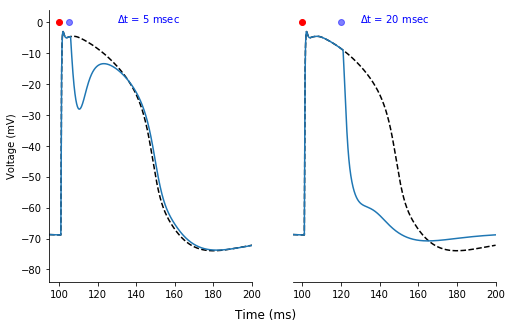

In [12]:
def plot_results(t,voltages,delay_1, delay_2):
    plt.figure(figsize=(8,5))
    ax = plt.subplot(1,2,1)
    plt.plot(t,voltages[9e9],'--k')
    plt.plot(t,voltages[delay_1],)
    plt.plot(100,0,'or')
    plt.plot(100+delay_1,0,'ob',alpha=0.5)
    plt.text(130,0,r'$\Delta$t = ' +str(delay_1) +' msec',color='blue')
    plt.xlim(95,200)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_ylabel('Voltage (mV)')
    ax = plt.subplot(1,2,2)
    plt.plot(t,voltages[9e9],'--k')
    plt.plot(t,voltages[delay_2],)
    plt.plot(100,0,'or')
    plt.plot(100+delay_2,0,'ob',alpha=0.5)
    plt.text(130,0,r'$\Delta$t = ' +str(delay_2) +' msec',color='blue')
    plt.xlim(95,200)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.suptitle('Time (ms)', x=0.5,y=0.05)

plot_results(t,voltages, 5,20) # plot dealy 5 and delay 20